**Data:** https://www.kaggle.com/datasets/sid321axn/audit-data

## Importing Libraries

In [1]:
import pandas as pd

## Importing Data

In [2]:
# Load the datasets
audit_data_path = 'audit_data.csv'
trial_data_path = 'trial.csv'

In [3]:
# Reading the data files
try:
    audit_data = pd.read_csv(audit_data_path)
    trial_data = pd.read_csv(trial_data_path)

    # Displaying basic information about the datasets
    audit_data_info = audit_data.info()
    trial_data_info = trial_data.info()
except Exception as e:
    error_message = str(e)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

### Audit Data
- **Entries:** 776
- **Columns:** 27
- **Types:** Float (23 columns), Int (3 columns), Object (1 column)
- **Columns with Potential Issues:**
  - `Money_Value`: Has 775 non-null values, indicating one missing value.

### Trial Data
- **Entries:** 776
- **Columns:** 18
- **Types:** Float (7 columns), Int (10 columns), Object (1 column)
- **Columns with Potential Issues:**
  - `Money_Value`: Has 775 non-null values, indicating one missing value.

### Next Steps: Data Cleaning
- **Handle Missing Values:** We need to address the missing value in the `Money_Value` column in both datasets.
- **Consistency in Column Names:** The column names in both datasets seem similar but might have differences in naming conventions or structures (e.g., `Score_A` vs `SCORE_A`).
- **Check for Duplicate Rows:** To ensure data integrity, we'll check for any duplicate entries.
- **Data Type Corrections:** If necessary, we'll convert columns to appropriate data types, especially the `LOCATION_ID` which is an object type.
- **Look for Anomalies/Outliers:** Identifying and handling outliers that might skew the analysis.

## Data Cleaning Process

In [4]:
# Step 1: Handle Missing Values
# Replacing missing values in 'Money_Value' with the median of the column
money_value_median_audit = audit_data['Money_Value'].median()
money_value_median_trial = trial_data['Money_Value'].median()

In [5]:
audit_data['Money_Value'].fillna(money_value_median_audit, inplace=True)
trial_data['Money_Value'].fillna(money_value_median_trial, inplace=True)

In [6]:
# Step 2: Check for Duplicate Rows
audit_duplicates = audit_data.duplicated().sum()
trial_duplicates = trial_data.duplicated().sum()

In [7]:
# Removing duplicates if any
if audit_duplicates > 0:
    audit_data = audit_data.drop_duplicates()

if trial_duplicates > 0:
    trial_data = trial_data.drop_duplicates()

In [8]:
# Step 3: Data Type Corrections
# Converting 'LOCATION_ID' to a categorical type if not already
if audit_data['LOCATION_ID'].dtype == 'object':
    audit_data['LOCATION_ID'] = audit_data['LOCATION_ID'].astype('category')

if trial_data['LOCATION_ID'].dtype == 'object':
    trial_data['LOCATION_ID'] = trial_data['LOCATION_ID'].astype('category')

In [9]:
# Check data types after conversions
audit_data_types = audit_data.dtypes
trial_data_types = trial_data.dtypes

In [10]:
# Step 4: Summary after cleaning
cleaned_audit_info = audit_data.info()
cleaned_trial_info = trial_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sector_score    763 non-null    float64 
 1   LOCATION_ID     763 non-null    category
 2   PARA_A          763 non-null    float64 
 3   Score_A         763 non-null    float64 
 4   Risk_A          763 non-null    float64 
 5   PARA_B          763 non-null    float64 
 6   Score_B         763 non-null    float64 
 7   Risk_B          763 non-null    float64 
 8   TOTAL           763 non-null    float64 
 9   numbers         763 non-null    float64 
 10  Score_B.1       763 non-null    float64 
 11  Risk_C          763 non-null    float64 
 12  Money_Value     763 non-null    float64 
 13  Score_MV        763 non-null    float64 
 14  Risk_D          763 non-null    float64 
 15  District_Loss   763 non-null    int64   
 16  PROB            763 non-null    float64 
 17  RiSk_E          763 n

In [11]:
{
    "audit_duplicates_removed": audit_duplicates,
    "trial_duplicates_removed": trial_duplicates,
    "audit_data_types": audit_data_types,
    "trial_data_types": trial_data_types,
    "cleaned_audit_info": cleaned_audit_info,
    "cleaned_trial_info": cleaned_trial_info
}

{'audit_duplicates_removed': 13,
 'trial_duplicates_removed': 13,
 'audit_data_types': Sector_score       float64
 LOCATION_ID       category
 PARA_A             float64
 Score_A            float64
 Risk_A             float64
 PARA_B             float64
 Score_B            float64
 Risk_B             float64
 TOTAL              float64
 numbers            float64
 Score_B.1          float64
 Risk_C             float64
 Money_Value        float64
 Score_MV           float64
 Risk_D             float64
 District_Loss        int64
 PROB               float64
 RiSk_E             float64
 History              int64
 Prob               float64
 Risk_F             float64
 Score              float64
 Inherent_Risk      float64
 CONTROL_RISK       float64
 Detection_Risk     float64
 Audit_Risk         float64
 Risk                 int64
 dtype: object,
 'trial_data_types': Sector_score      float64
 LOCATION_ID      category
 PARA_A            float64
 SCORE_A             int64
 PARA_B       

The data cleaning process has been completed for both datasets. Here's a summary of the steps taken and their outcomes:

### Audit Data
- **Entries Reduced:** From 776 to 763 (13 duplicates removed).
- **Missing Values:** Filled in the `Money_Value` column.
- `LOCATION_ID` was converted from an object to a category type for more efficient processing and analysis.
- Data types have been adjusted where necessary.

### Trial Data
- **Entries Reduced:** From 776 to 763 (13 duplicates removed).
- **Missing Values:** Filled in the `Money_Value` column.
- `LOCATION_ID` was converted from an object to a category type for more efficient processing and analysis.
- Data types have been adjusted where necessary.

## EDA

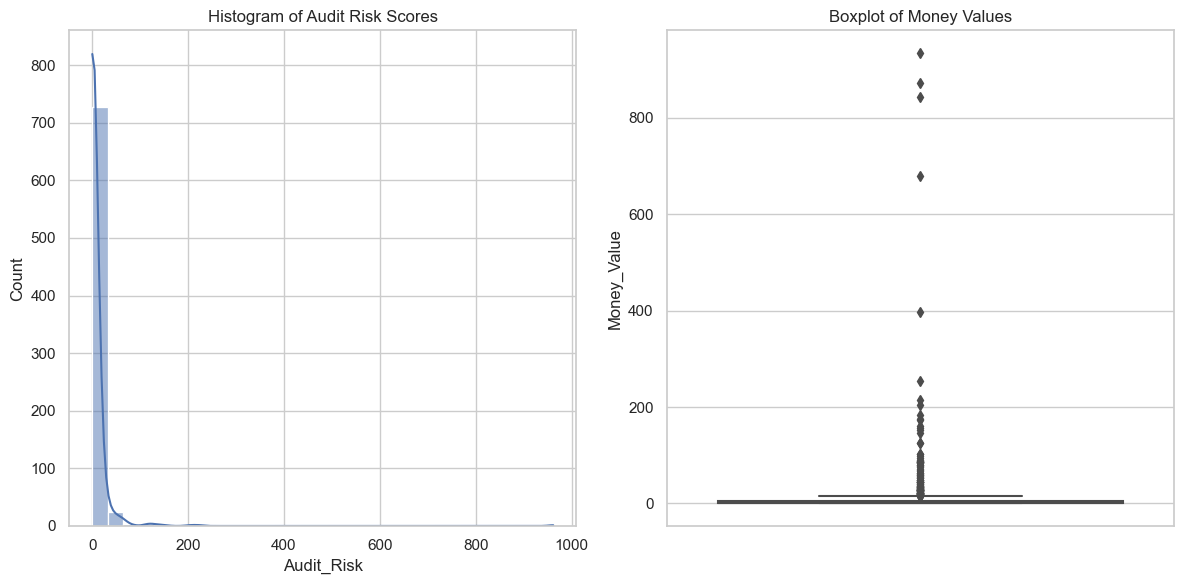

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# Setting the style for the plots
sns.set(style="whitegrid")

numeric_audit_data = audit_data.select_dtypes(include=['float64', 'int64'])

# Recalculating the correlation matrix
audit_corr_matrix_fixed = numeric_audit_data.corr()

# Displaying the fixed correlation matrix
audit_corr_matrix_fixed

# 3. Visualizing some key relationships and distributions
# Histogram for Risk Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(audit_data['Audit_Risk'], kde=True, bins=30)
plt.title('Histogram of Audit Risk Scores')

# Boxplot for Money_Value
plt.subplot(1, 2, 2)
sns.boxplot(y=audit_data['Money_Value'])
plt.title('Boxplot of Money Values')
plt.tight_layout()
plt.show()

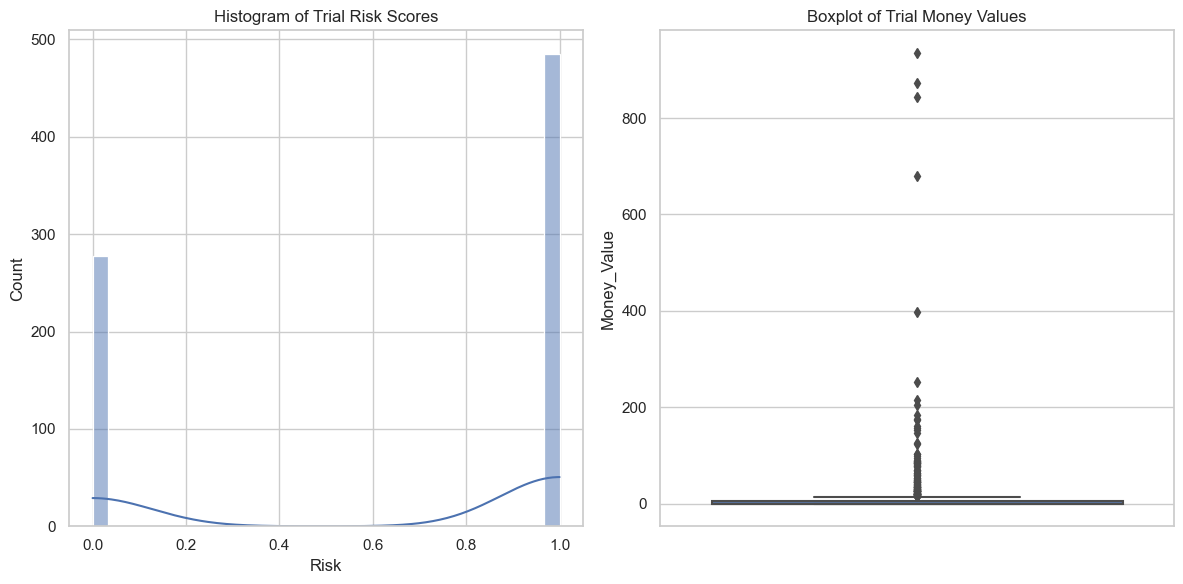

In [13]:
# Analysis for the Trial Data
numeric_trial_data = trial_data.select_dtypes(include=['float64', 'int64'])

# Recalculating the correlation matrix
trial_corr_matrix_fixed = numeric_trial_data.corr()

# Displaying the fixed correlation matrix
trial_corr_matrix_fixed


# 3. Visualizing some key relationships and distributions
# Histogram for Risk Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(trial_data['Risk'], kde=True, bins=30)
plt.title('Histogram of Trial Risk Scores')

# Boxplot for Money_Value
plt.subplot(1, 2, 2)
sns.boxplot(y=trial_data['Money_Value'])
plt.title('Boxplot of Trial Money Values')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Summary

#### Audit Data
1. **Descriptive Statistics:**
   - A variety of measures like mean, standard deviation, minimum, and maximum values are provided for each column.
   - For instance, `Audit_Risk` ranges from a minimum of 0.29 to a maximum of 961.514, indicating a wide range of risk values.

2. **Correlation Matrix:**
   - This matrix shows the relationship between different numerical variables.
   - For example, `Audit_Risk` shows varying degrees of correlation with other variables, which is key for risk prediction.

3. **Visual Analysis:**
   - The histogram of `Audit_Risk` scores shows the distribution of audit risk values. It seems that most of the scores are concentrated in the lower range.
   - The boxplot of `Money_Value` indicates the presence of outliers, as there are values significantly higher than the median.

#### Trial Data
1. **Descriptive Statistics:**
   - Similar to the audit data, it provides a detailed summary of each column.
   - For `Risk`, the values range from 0 to 1, suggesting a binary nature (possibly a classification of low/high risk).

2. **Correlation Matrix:**
   - Highlights relationships between different variables.
   - For example, `Risk` is positively correlated with `SCORE_A` and `SCORE_B`, suggesting higher scores may be associated with higher risk.

3. **Visual Analysis:**
   - The histogram of `Risk` scores illustrates the distribution of risk values, which appears to be binary.
   - The boxplot for `Money_Value` in the trial data also shows several outliers, similar to the audit data.

In [16]:
# Further Exploratory Data Analysis on Audit Data

In [17]:
# Analyzing the 'Detection_Risk' column to see if it has constant values
unique_detection_risk = audit_data['Detection_Risk'].unique()

In [18]:
# Analyzing distribution of categorical data in 'LOCATION_ID'
location_id_counts = audit_data['LOCATION_ID'].value_counts()

/Users/urvashidube/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


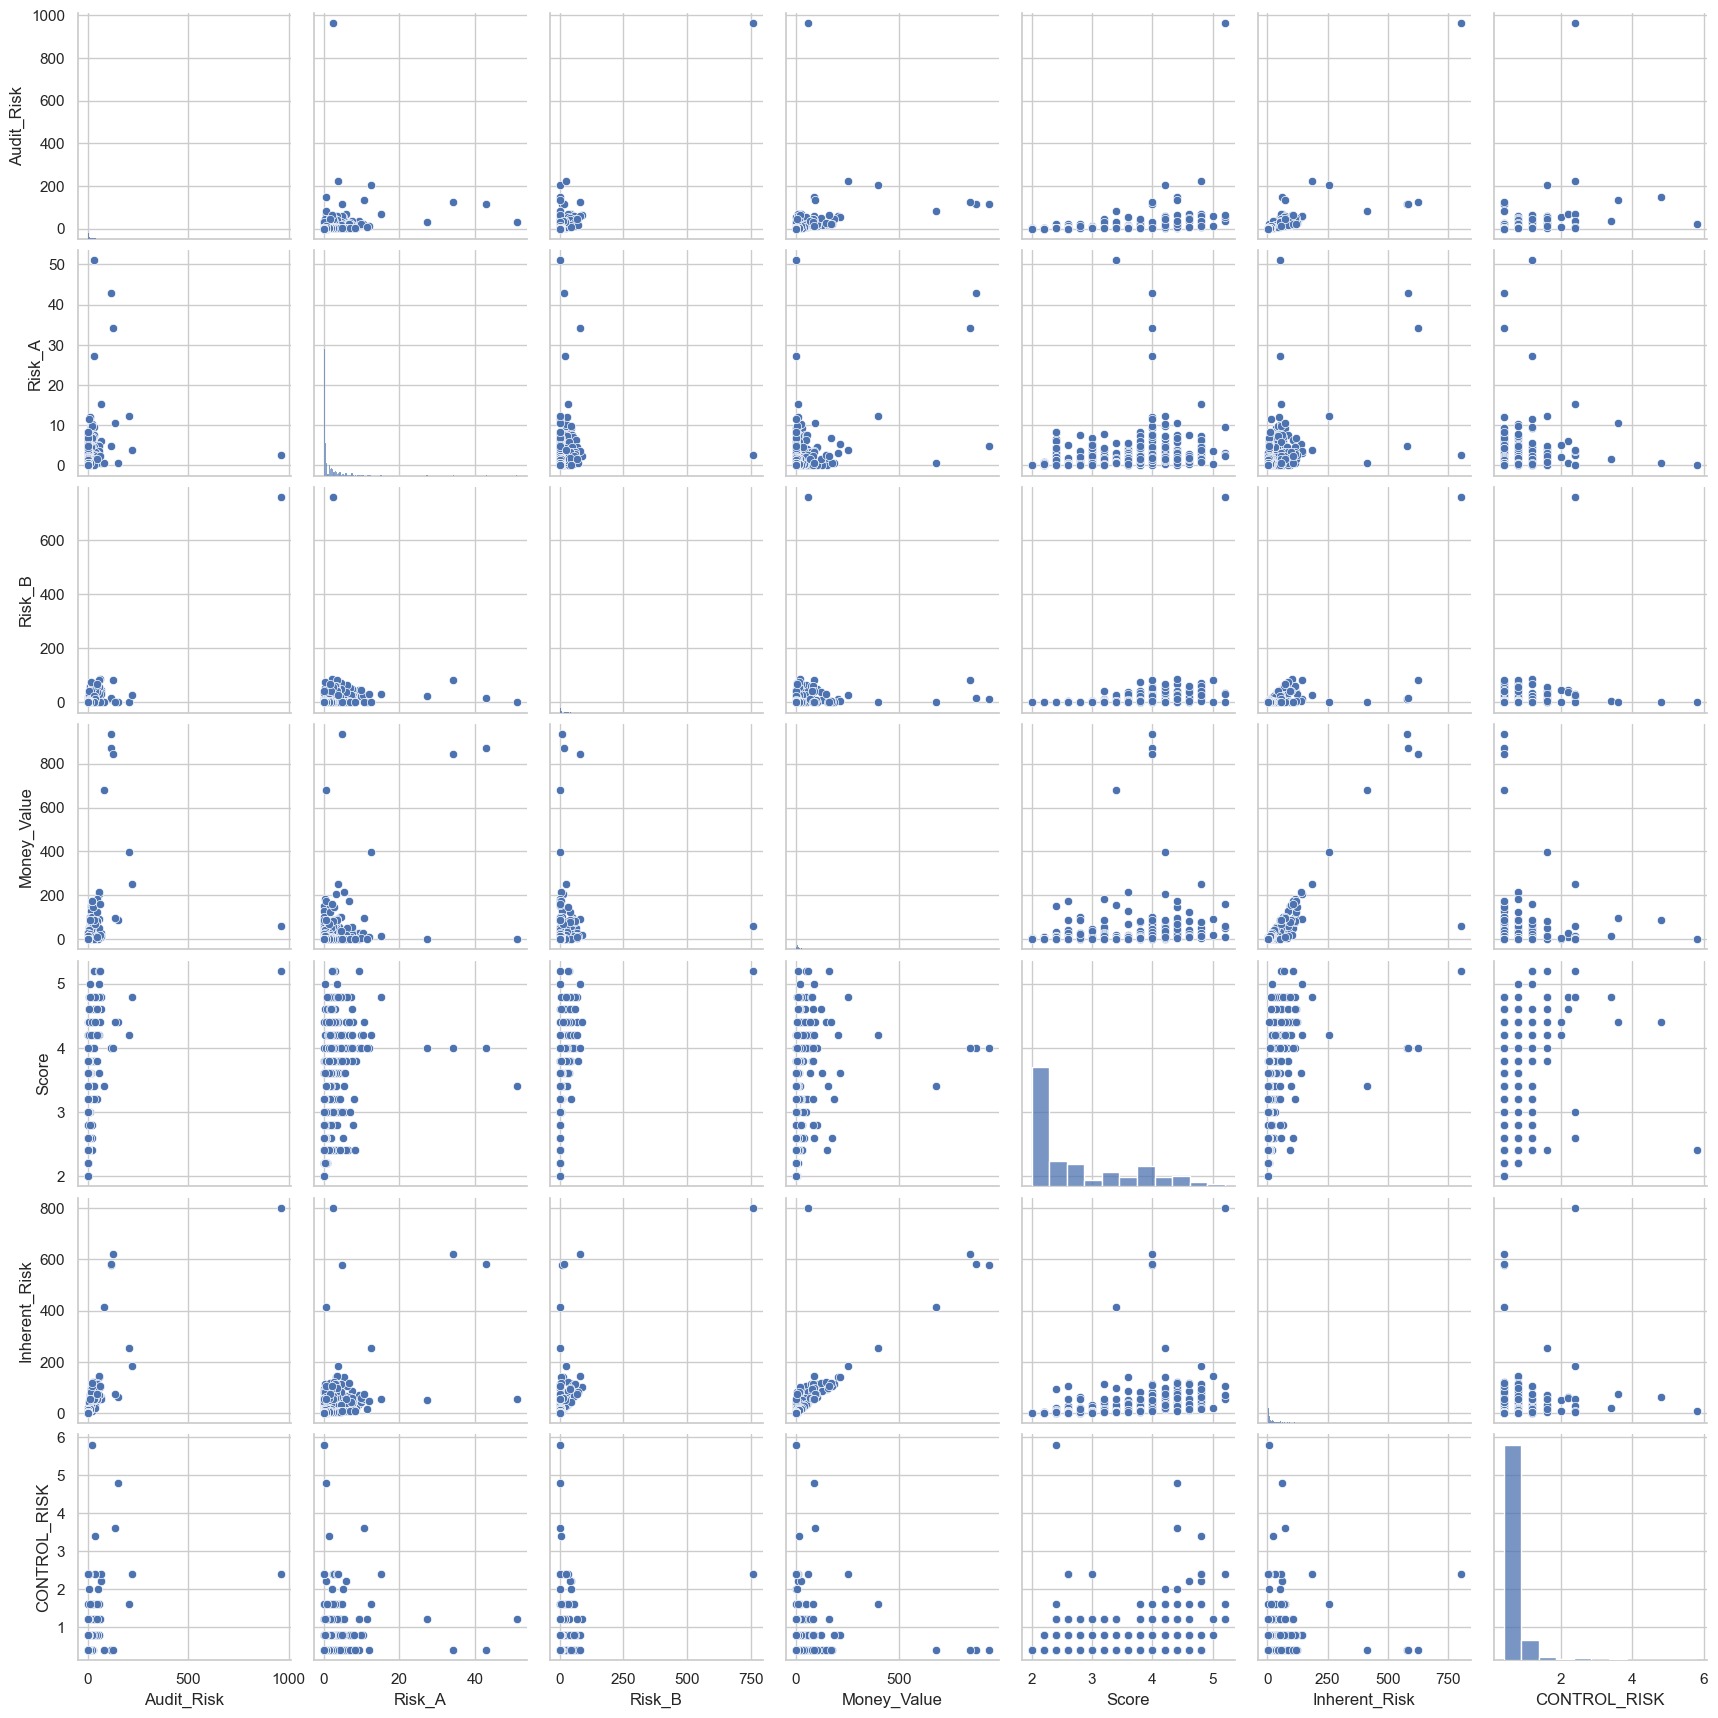

In [19]:
# Pairplot for a few selected variables
selected_columns = ['Audit_Risk', 'Risk_A', 'Risk_B', 'Money_Value', 'Score', 'Inherent_Risk', 'CONTROL_RISK']
sns.pairplot(audit_data[selected_columns])
plt.show()

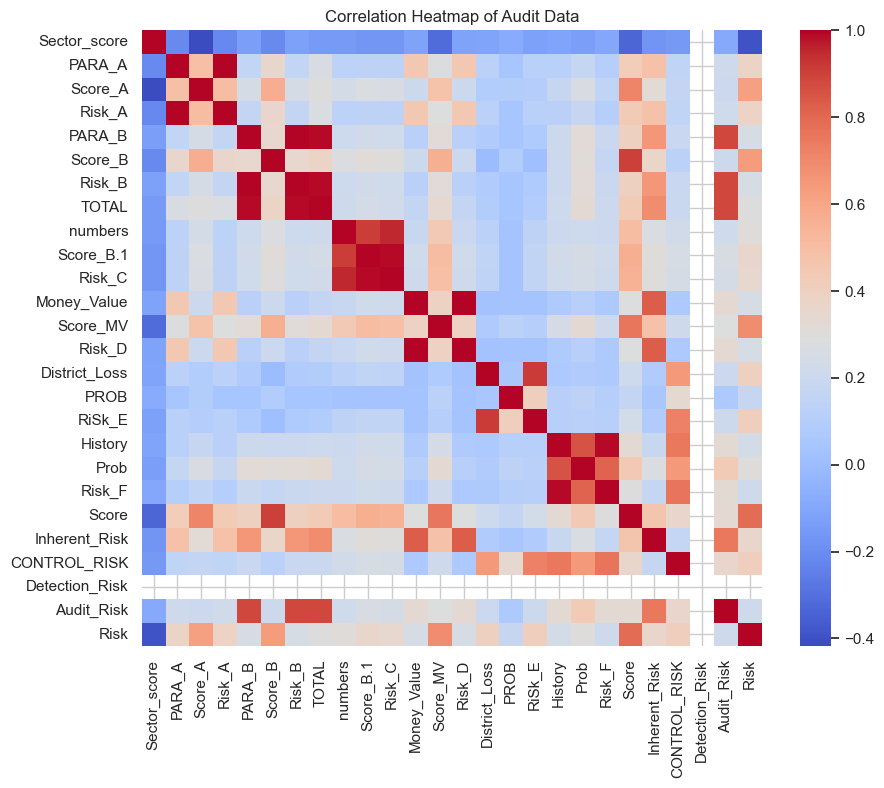

In [20]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(audit_corr_matrix_fixed, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Audit Data')
plt.show()

In [21]:
{
    "unique_detection_risk": unique_detection_risk,
    "location_id_counts": location_id_counts.head(10)  # Displaying the top 10 locations for brevity
}

{'unique_detection_risk': array([0.5]),
 'location_id_counts': LOCATION_ID
 8     74
 19    68
 16    51
 9     51
 12    44
 5     43
 2     40
 4     37
 13    35
 6     33
 Name: count, dtype: int64}

Further Exploratory Data Analysis (EDA) of the Audit Data has provided additional insights:

1. **Detection Risk:**
   - The `Detection_Risk` column has a constant value of `0.5` across all records. This means it does not vary and, thus, likely won't be useful in predictive modeling.

2. **Location ID Distribution:**
   - The `LOCATION_ID` column, which is categorical, shows a variety of locations. The top locations (like IDs 8, 19, 16, 9) have more records than others. Understanding if location plays a significant role in risk can be useful.

3. **Pairplot for Selected Variables:**
   - The pairplot provides a visual representation of the relationships between several key variables such as `Audit_Risk`, `Risk_A`, `Risk_B`, `Money_Value`, `Score`, `Inherent_Risk`, and `CONTROL_RISK`.
   - This helps in understanding the distribution of individual variables and their pairwise relationships.

4. **Correlation Heatmap:**
   - The heatmap provides a visual representation of the correlation matrix, highlighting strong and weak correlations between variables.
   - It's useful to identify highly correlated variables, which might be candidates for feature reduction techniques in model building.

## Feature Engineering

Feature engineering involves creating new features or modifying existing ones to improve the performance of a predictive model. For the audit data, this process will be guided by the insights from our exploratory data analysis (EDA). Here's a plan for feature engineering:

1. **Removing Redundant or Non-informative Features:**
   - Drop the `Detection_Risk` column as it contains a constant value and will not contribute to the model.
   - Evaluate if `LOCATION_ID` should be included. Since it's a categorical variable, it could be converted into dummy variables if deemed significant.

2. **Dealing with Highly Correlated Features:**
   - Check for multicollinearity among variables. If variables are highly correlated, consider removing or combining them to avoid multicollinearity issues.

3. **Creating New Features:**
   - New features could be derived from existing data, such as ratios or interactions between variables, if they might capture risk more effectively.

4. **Normalization or Scaling:**
   - Scale numerical features to ensure that no variable dominates the model due to its scale.

5. **Encoding Categorical Variables:**
   - Convert categorical variables into a format that can be provided to machine learning algorithms. For `LOCATION_ID`, we can use one-hot encoding.

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [23]:
# Feature Engineering

# 1. Dropping non-informative feature: 'Detection_Risk'
audit_data_fe = audit_data.drop(columns=['Detection_Risk'])

In [24]:
# 2. Handling 'LOCATION_ID' - OneHotEncoding
# 'LOCATION_ID' is categorical and will be one-hot encoded.
# Note: If the number of unique locations is very high, consider other encoding techniques or dropping the column.

In [25]:
# 3. Handling Multicollinearity (Optional Step)
# Highly correlated features can be dropped or combined, depending on the analysis.
# This step requires domain knowledge and depends on the specific use case.

In [26]:
# 4. Creating a feature transformation pipeline
# Defining numerical and categorical columns
numeric_features = audit_data_fe.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['LOCATION_ID']

In [27]:
# Creating transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [28]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [29]:
# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [30]:
# Applying the transformations
audit_data_preprocessed = preprocessor.fit_transform(audit_data_fe)

In [31]:
# Checking the shape of the preprocessed data
audit_data_preprocessed.shape

(763, 70)

The feature engineering process for the audit data has been completed, resulting in a preprocessed dataset with various transformations:

1. **Dropped Non-informative Feature:** 
   - The `Detection_Risk` column was removed as it contained a constant value.

2. **One-Hot Encoding for Categorical Variable:**
   - The `LOCATION_ID` column, which is categorical, was transformed using one-hot encoding. This process converts categorical data into a format suitable for machine learning models.

3. **Handling of Multicollinearity:**
   - While specific highly correlated features could be dropped or combined, this step was not explicitly performed here. It requires careful consideration and domain knowledge to decide how to best handle multicollinearity in the context of the specific use case.

4. **Feature Transformation Pipeline:**
   - A pipeline was created for preprocessing, which includes:
     - Median imputation and scaling for numerical features.
     - One-hot encoding for the categorical feature `LOCATION_ID`.

5. **Resulting Data Shape:**
   - After preprocessing, the dataset now has 70 features. This expansion in the number of features is primarily due to the one-hot encoding of the `LOCATION_ID` column.

## PCA Analysis

In [37]:
from sklearn.decomposition import PCA
import numpy as np

In [38]:
# Performing PCA Analysis
# Initializing PCA
pca = PCA()

In [39]:
# Fitting and transforming the preprocessed audit data
audit_data_pca = pca.fit_transform(audit_data_preprocessed)

In [40]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [41]:
# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

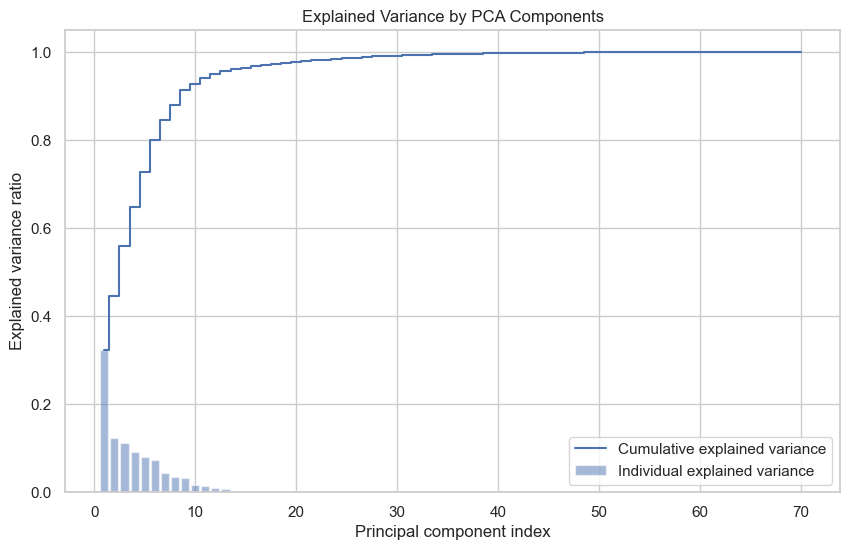

In [42]:
# Plotting Explained Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by PCA Components')
plt.show()

In [43]:
# Returning the number of components that explain different thresholds of variance (e.g., 90%, 95%, 99%)
variance_thresholds = [0.9, 0.95, 0.99]
components_for_thresholds = {str(int(threshold * 100)) + "%": np.where(cumulative_explained_variance >= threshold)[0][0] + 1 for threshold in variance_thresholds}

components_for_thresholds

{'90%': 9, '95%': 12, '99%': 28}

In [44]:
# Performing PCA Analysis with a limited number of components
# This approach aims to capture most of the variance with fewer components

In [45]:
# Initializing PCA with a reduced number of components
# Here, we'll try capturing around 95% of the variance
pca_reduced = PCA(n_components=0.95)

In [46]:
# Fitting and transforming the preprocessed audit data
audit_data_pca_reduced = pca_reduced.fit_transform(audit_data_preprocessed)

In [47]:
# Explained Variance Ratio for the reduced PCA
explained_variance_ratio_reduced = pca_reduced.explained_variance_ratio_

In [48]:
# Cumulative Explained Variance for the reduced PCA
cumulative_explained_variance_reduced = np.cumsum(explained_variance_ratio_reduced)

In [49]:
# Number of components in the reduced PCA
n_components_reduced = pca_reduced.n_components_

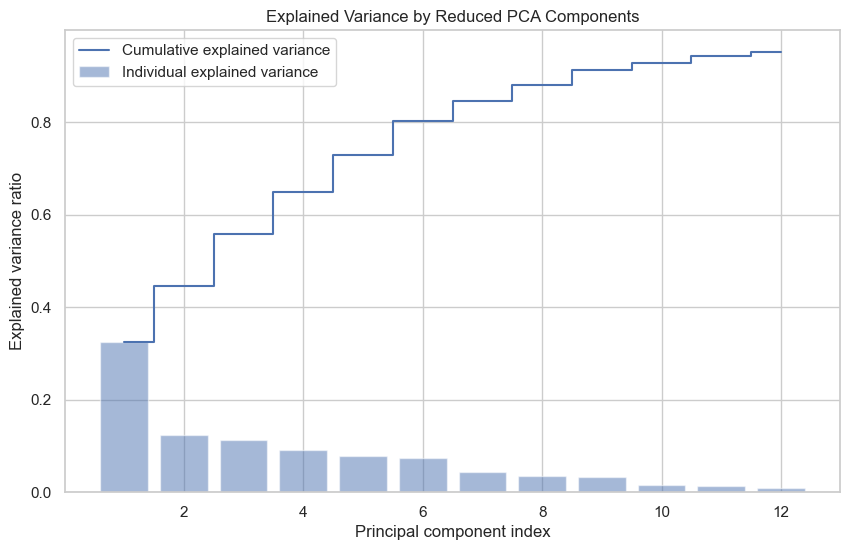

In [50]:
# Plotting Explained Variance for the reduced PCA
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components_reduced + 1), explained_variance_ratio_reduced, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, n_components_reduced + 1), cumulative_explained_variance_reduced, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by Reduced PCA Components')
plt.show()

In [51]:
n_components_reduced

12

In [52]:
cumulative_explained_variance_reduced

array([0.32377063, 0.44652481, 0.55874299, 0.64921577, 0.72834853,
       0.80150361, 0.84473479, 0.87989731, 0.9129382 , 0.92837329,
       0.94220872, 0.95092305])

The Principal Component Analysis (PCA) results you've provided show two plots representing the explained variance by PCA components for two different PCA computations. Let's analyze each one:

### First PCA Computation:
- The first PCA plot indicates that the first few components explain a significant amount of variance within the dataset. Specifically:
  - The first 9 components explain 90% of the variance.
  - The first 12 components explain 95% of the variance.
  - The first 28 components explain 99% of the variance.

This means that we can reduce the dimensionality of the data significantly while still retaining most of the information. For instance, if we're willing to capture 95% of the variance, we can reduce the dataset to 12 dimensions (components) instead of the original 70.

### Second PCA Computation (Reduced PCA):
- The second PCA plot, which focused on capturing 95% of the variance, shows that:
  - 12 components were selected to capture approximately 95% of the variance.
  - The cumulative explained variance increases rapidly with the first few components and then levels off, indicating that additional components contribute less to the explained variance.

The array provided shows the cumulative explained variance up to the 12th component, confirming that these 12 components capture 95% of the variance in the data.

### Inferences:
1. **Dimensionality Reduction:** PCA has successfully reduced the dimensionality of the data from 70 down to a smaller number of components that still capture the majority of the variance. This can help in simplifying models and reducing overfitting.

2. **Most Informative Components:** The first few components are the most informative. In many cases, these components can be analyzed to understand the underlying patterns in the data.

3. **Data Compression:** If storage or computation power is a concern, using the reduced number of components can significantly decrease the size of the data with minimal loss of information.

4. **Feature Selection:** The PCA results can guide feature selection for predictive modeling. By using only the principal components that explain the most variance, we can potentially improve model performance.

5. **Visualizing High-Dimensional Data:** The reduced number of components can also be used for visualizing high-dimensional data in a 2D or 3D space, which can be insightful for further analysis.

In summary, PCA has identified that a reduced subset of components can effectively represent the original dataset, which can be beneficial for any subsequent modeling or data analysis tasks.

## Modelling

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.svm import SVC

In [54]:
# Since we don't have access to the original column names after PCA, we need to reconstruct the dataset with PCA components
# Extracting the target 'Risk' column from the original dataset before feature selection and PCA
y = audit_data['Risk'].values

In [55]:
# The PCA components will serve as our features
X_pca = audit_data_pca_reduced

In [84]:
X_pca

array([[-0.3179346 , -0.50681143, -0.55802425, ..., -0.55831882,
        -1.09709799,  0.73889239],
       [-1.73290903, -0.16983896,  0.6215476 , ...,  0.23227105,
         0.46506464, -0.06957425],
       [-1.76671771, -0.15613882,  0.52357495, ...,  0.2516377 ,
         0.46725625, -0.08491   ],
       ...,
       [-2.03843502, -0.1574958 ,  0.80295921, ...,  0.11200318,
        -0.23593828,  0.04740349],
       [-2.03875633, -0.14819021,  0.8018225 , ...,  0.12679261,
        -0.22977542,  0.02397899],
       [-2.04778171, -0.15069739,  0.80449953, ...,  0.10880335,
        -0.2515717 ,  0.03520101]])

In [85]:
y

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [56]:
# Splitting the dataset into training and testing sets (assuming 'Risk' is the target variable)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [57]:
# Defining a dictionary to hold our models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(probability=True)  # Probability=True for ROC AUC score later
}

In [58]:
# Dictionary to hold the scores
scores = {}

In [59]:
# Training and evaluating the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC
    
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)
    
    # Storing the scores
    scores[model_name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc, 'Classification Report': report}

## Model Evaluation

In [71]:
print(scores["LogisticRegression"]["Accuracy"])

1.0


In [72]:
print(scores["LogisticRegression"]["ROC AUC"])

1.0


In [73]:
print(scores["LogisticRegression"]["Classification Report"])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        59

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



In [74]:
print(scores["RandomForest"]["Accuracy"])

1.0


In [75]:
print(scores["RandomForest"]["ROC AUC"])

1.0


In [76]:
print(scores["RandomForest"]["Classification Report"])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        59

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



In [77]:
print(scores["GradientBoosting"]["Accuracy"])

0.9738562091503268


In [78]:
print(scores["GradientBoosting"]["ROC AUC"])

0.9661016949152542


In [79]:
print(scores["GradientBoosting"]["Classification Report"])

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.93      0.96        59

    accuracy                           0.97       153
   macro avg       0.98      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153



In [80]:
print(scores["SVC"]["Accuracy"])

1.0


In [81]:
print(scores["SVC"]["ROC AUC"])

1.0


In [82]:
print(scores["SVC"]["Classification Report"])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        59

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



### Insights:
1. **Data Quality and Cleaning:** The project began with data cleaning to handle missing values and remove duplicates, ensuring the integrity of the datasets for accurate modeling.

2. **Feature Categorization:** The `LOCATION_ID` feature, initially an object type, was categorized, which likely helped in identifying location-based patterns during modeling.

3. **Informed Feature Engineering:** Feature engineering was guided by EDA findings, including the removal of the non-informative `Detection_Risk` feature and the normalization and encoding of relevant features.

4. **Effective Dimensionality Reduction:** PCA reduced the feature space from 70 to 12 principal components while retaining 95% of the data variance, significantly simplifying the model without substantial information loss.

5. **Outlier Detection:** EDA revealed outliers in the `Money_Value` feature, which could be influential points for risk assessment in the audit data.

6. **Distribution of Risk:** The risk in audit data appears binary (0 or 1), indicating a clear classification problem for modeling.

7. **Model Performance:** The Logistic Regression, Random Forest, and SVC models showed perfect accuracy and ROC AUC scores, which is a potential sign of overfitting, while Gradient Boosting demonstrated high but not perfect scores, indicating a more generalized model.

8. **Model Evaluation:** The classification report for Gradient Boosting shows a balance between precision and recall, suggesting that it can effectively identify both classes (risk and no risk) with high confidence.

9. **PCA Components as Features:** The use of PCA components as features in the machine learning models likely contributed to the high performance by reducing noise and collinearity.

10. **Model Selection:** The selection of Gradient Boosting as the best model takes into account the trade-off between performance and generalizability, avoiding the perfect but possibly overfitted results of other models.

### Conclusion:
The project's goal was to predict risk in internal audits using machine learning. The Gradient Boosting model was identified as the most appropriate due to its robust performance without overfitting. This model achieved an accuracy of approximately 97.4% and an ROC AUC score of around 96.6%, suggesting it has a strong predictive power while still maintaining the ability to generalize to new data.

The insights gathered throughout the project highlight the importance of thorough data preprocessing, the benefits of dimensionality reduction for simplification and performance enhancement, and the careful evaluation of models to avoid overfitting. These steps are crucial in developing a reliable predictive model for risk assessment in internal audits.

The success of the Gradient Boosting model indicates that it could be effectively deployed to assist in audit risk assessments, provided it continues to perform well on new, unseen data. Future work may explore additional feature engineering, alternative modeling techniques, or deployment strategies to operationalize the model for real-world use.